In [1]:
import pandas as pd 
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score
import pickle

In [2]:
file = 'car_prices.csv'
df = pd.read_csv(file, error_bad_lines=False)

/var/folders/xd/gtdc22ts2b90fl2b_p9xbrhc0000gn/T/ipykernel_76625/3152590117.py:2: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(file, error_bad_lines=False)
b'Skipping line 408163: expected 16 fields, saw 17\nSkipping line 417837: expected 16 fields, saw 17\nSkipping line 421291: expected 16 fields, saw 17\nSkipping line 424163: expected 16 fields, saw 17\n'
b'Skipping line 427042: expected 16 fields, saw 17\nSkipping line 427045: expected 16 fields, saw 17\nSkipping line 434426: expected 16 fields, saw 17\nSkipping line 444503: expected 16 fields, saw 17\nSkipping line 453796: expected 16 fields, saw 17\n'
b'Skipping line 461599: expected 16 fields, saw 17\nSkipping line 461614: expected 16 fields, saw 17\n'
b'Skipping line 492486: expected 16 fields, saw 17\nSkipping line 497010: expected 16 fields, saw 17\nSkipping line 497013: expected 16 fields, saw 17\nSkipping line 499

In [3]:
df.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,"kia motors america, inc",20500,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,"kia motors america, inc",20800,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,4.5,1331.0,gray,black,financial services remarketing (lease),31900,30000,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,4.1,14282.0,white,black,volvo na rep/world omni,27500,27750,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,4.3,2641.0,gray,black,financial services remarketing (lease),66000,67000,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


In [4]:
df.shape

(558811, 16)

In [5]:
#clean data 
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558811 entries, 0 to 558810
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558811 non-null  int64  
 1   make          548510 non-null  object 
 2   model         548412 non-null  object 
 3   trim          548160 non-null  object 
 4   body          545616 non-null  object 
 5   transmission  493458 non-null  object 
 6   vin           558811 non-null  object 
 7   state         558811 non-null  object 
 8   condition     547017 non-null  float64
 9   odometer      558717 non-null  float64
 10  color         558062 non-null  object 
 11  interior      558062 non-null  object 
 12  seller        558811 non-null  object 
 13  mmr           558811 non-null  int64  
 14  sellingprice  558811 non-null  int64  
 15  saledate      558811 non-null  object 
dtypes: float64(2), int64(3), object(11)
memory usage: 68.2+ MB


In [6]:
#drop null values
df = df.dropna(how='any',axis=0) 

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 472336 entries, 0 to 558810
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          472336 non-null  int64  
 1   make          472336 non-null  object 
 2   model         472336 non-null  object 
 3   trim          472336 non-null  object 
 4   body          472336 non-null  object 
 5   transmission  472336 non-null  object 
 6   vin           472336 non-null  object 
 7   state         472336 non-null  object 
 8   condition     472336 non-null  float64
 9   odometer      472336 non-null  float64
 10  color         472336 non-null  object 
 11  interior      472336 non-null  object 
 12  seller        472336 non-null  object 
 13  mmr           472336 non-null  int64  
 14  sellingprice  472336 non-null  int64  
 15  saledate      472336 non-null  object 
dtypes: float64(2), int64(3), object(11)
memory usage: 61.3+ MB


In [8]:
max_x = df.loc[df['odometer'].idxmax()]
max_x
df = df[df.odometer < 300000]
df["make/model"] = df['make']+' '+df['model']
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 471803 entries, 0 to 558810
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          471803 non-null  int64  
 1   make          471803 non-null  object 
 2   model         471803 non-null  object 
 3   trim          471803 non-null  object 
 4   body          471803 non-null  object 
 5   transmission  471803 non-null  object 
 6   vin           471803 non-null  object 
 7   state         471803 non-null  object 
 8   condition     471803 non-null  float64
 9   odometer      471803 non-null  float64
 10  color         471803 non-null  object 
 11  interior      471803 non-null  object 
 12  seller        471803 non-null  object 
 13  mmr           471803 non-null  int64  
 14  sellingprice  471803 non-null  int64  
 15  saledate      471803 non-null  object 
 16  make/model    471803 non-null  object 
dtypes: float64(2), int64(3), object(12)
memory usage

In [9]:
import matplotlib.pyplot as plt

In [10]:
import seaborn as sns

In [11]:
df.to_csv('Updated_data.csv')

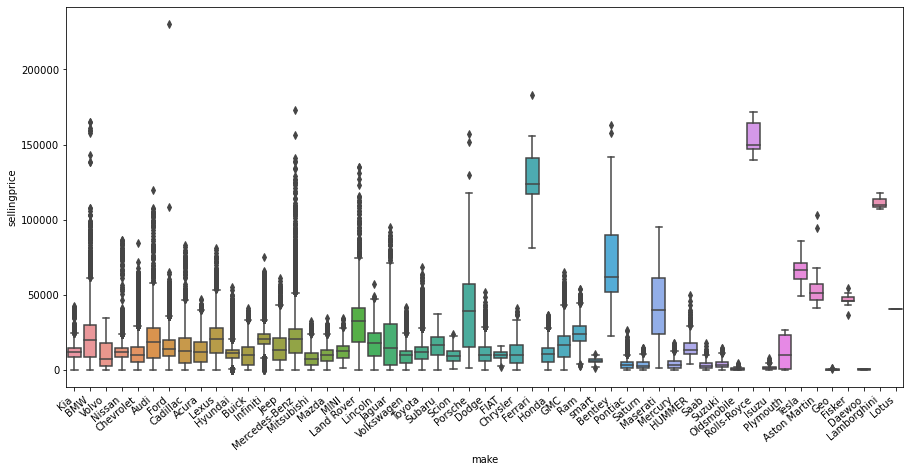

In [12]:
plt.subplots(figsize=(15,7))
ax=sns.boxplot(x='make',y='sellingprice',data=df)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
plt.show()

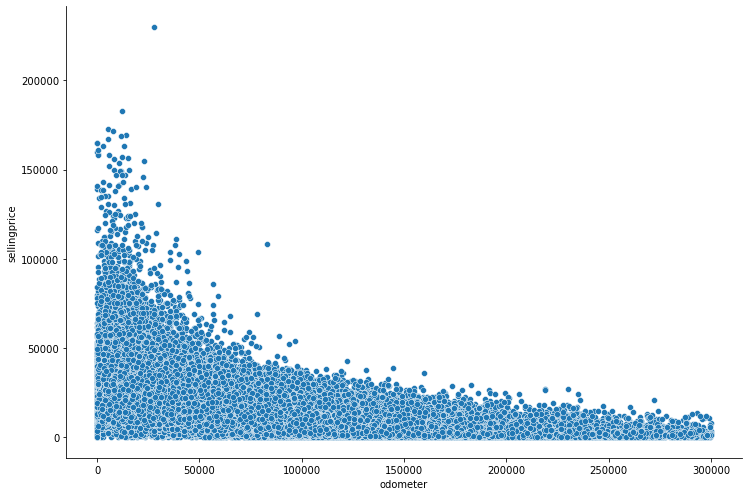

In [13]:
sns.relplot(x='odometer',y='sellingprice',data=df,height=7,aspect=1.5)

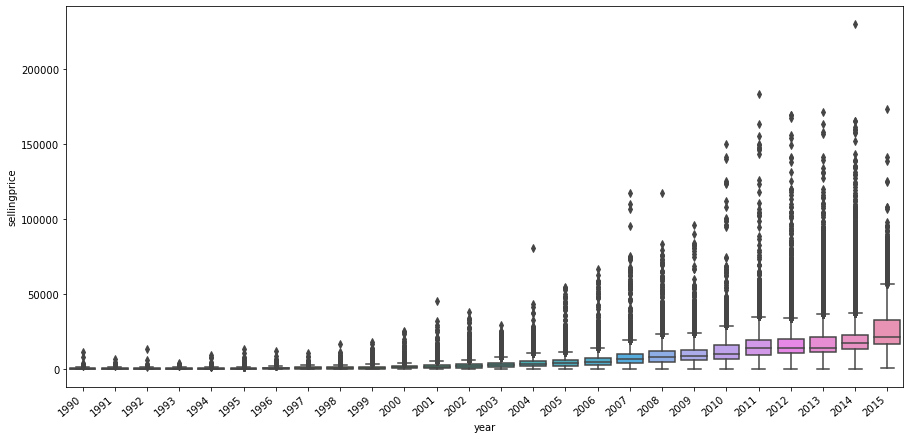

In [14]:
plt.subplots(figsize=(15,7))
ax=sns.boxplot(x='year',y='sellingprice',data=df)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
plt.show()

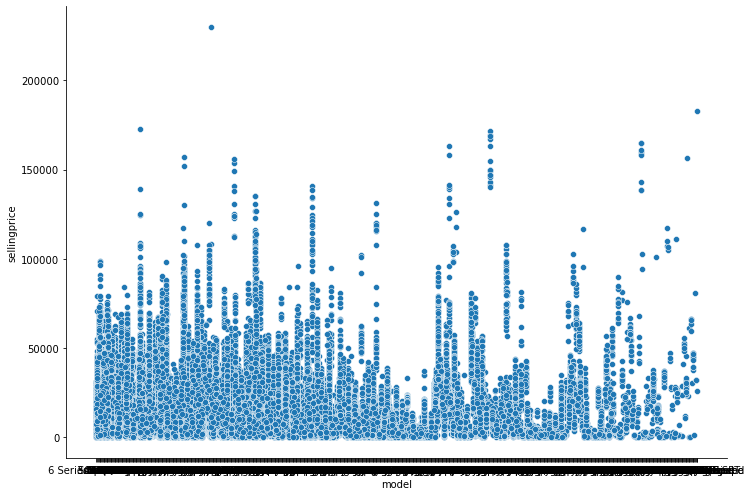

In [15]:
sns.relplot(x='model',y='sellingprice',data=df,height=7,aspect=1.5)

In [16]:
#set up independent and dependent variables
x = df[['make/model','year','odometer','state','condition']]
y = df['sellingprice']

In [37]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [38]:
from sklearn.linear_model import LinearRegression

In [39]:
encoder=OneHotEncoder()
encoder.fit(x[['make/model','state']])

OneHotEncoder()

In [40]:
column_trans=make_column_transformer((OneHotEncoder(categories=encoder.categories_),['make/model','state']),
                                    remainder='passthrough')

In [41]:
model=LinearRegression()

In [42]:
pipeline=make_pipeline(column_trans,model)

In [43]:
pipeline.fit(x_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['Acura CL', 'Acura ILX', 'Acura Integra', 'Acura Legend',
       'Acura MDX', 'Acura RDX', 'Acura RL', 'Acura RLX', 'Acura RSX',
       'Acura TL', 'Acura TLX', 'Acura TSX', 'Acura TSX Sport Wagon',
       'Acura ZDX', 'Acura mdx', 'Aston Martin DB9',
       'Aston Marti...
       'Volvo V50', 'Volvo V60', 'Volvo V70', 'Volvo XC', 'Volvo XC60',
       'Volvo XC70', 'Volvo XC90', 'smart fortwo'], dtype=object),
                                                                            array(['al', 'az', 'ca', 'co', 'fl', 'ga', 'hi', 'il', 'in', 'la', 'ma',
       'md', 'mi', 'mn', 'mo', 'ms', 'nc', 'ne', 'nj', 'nm', 'nv', 'ny',
       'oh', 'ok', 'or', 'pa', 'pr', 'sc', 'tn', 'tx', 'ut', 'va', 'wa',
       'wi'], dtype=object)]),
            

In [44]:
y_pred=pipeline.predict(x_test)

In [45]:
r2_score(y_test,y_pred)

0.8248166511377377

In [46]:
pipeline.predict(pd.DataFrame([['Kia Sorento','2015','16639.0','ca',5.0]],columns=['make/model','year','odometer','state','condition']))

array([20958.90658072])

In [47]:
pickle.dump(pipeline,open('LinearRegressionModel.pkl','wb'))